/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 1.2693746089935303 | D acc.: 22.66%] [G loss: [array(1.0577608, dtype=float32), array(1.0577608, dtype=float32), array(0.453125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


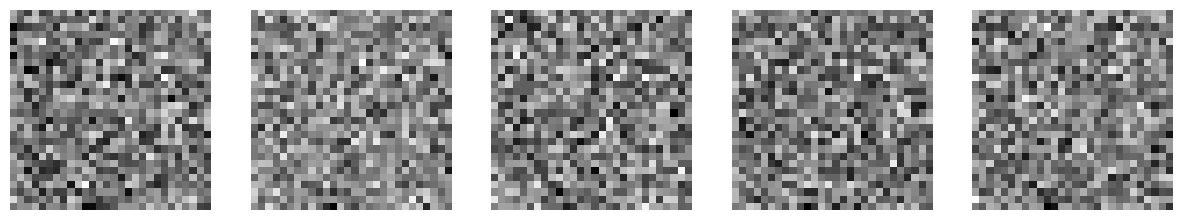

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [1]:
# Implement a simple GAN architecture to generate random images (like noise or basic shapes) using
# TensorFlow/Keras

import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

# Generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([
        generator,
        discriminator
    ])
    return model

# Training the GAN
def train_gan(generator, discriminator, gan, latent_dim, epochs=1000, batch_size=32):
    (X_train, _), _ = tf.keras.datasets.mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
    X_train = np.expand_dims(X_train, axis=-1)

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, valid)

        # Print the progress
        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}]")
            sample_images(generator, latent_dim)

# Sampling images
def sample_images(generator, latent_dim, n_samples=5):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(1, n_samples, figsize=(15, 5))
    for i in range(n_samples):
        axs[i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[i].axis('off')
    plt.show()

# Initialize models
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train the GAN
train_gan(generator, discriminator, gan, latent_dim)


In [2]:
#  Implement the discriminator for a GAN with an image input of shape (28, 28)

import tensorflow as tf
from tensorflow.keras import layers, Sequential

def build_discriminator(input_shape=(28, 28)):
    """
    Builds the discriminator model for a GAN.

    Args:
        input_shape (tuple): Shape of the input image, default is (28, 28).

    Returns:
        tf.keras.Model: The discriminator model.
    """
    model = Sequential(name="Discriminator")

    # Flatten the input image
    model.add(layers.Flatten(input_shape=input_shape))

    # First dense layer
    model.add(layers.Dense(128, activation='relu'))

    # Second dense layer
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with a single neuron for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Instantiate the discriminator
discriminator = build_discriminator()

# Compile the discriminator
# Using Binary Crossentropy loss since it's a binary classification task
discriminator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
discriminator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.4924, acc.: 73.05%] [G loss: 0.6040]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


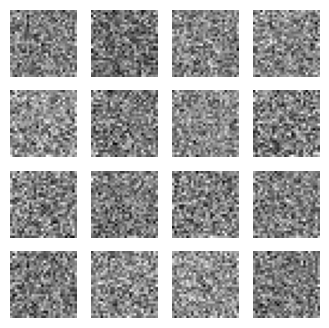

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━

In [2]:
#  Train the generator to produce simple digits (using noise as input) and plot the generated images

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)

# Hyperparameters
batch_size = 128
latent_dim = 100
epochs = 100
sample_interval = 100

# Build the generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(0.2),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation="tanh"),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Build the discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512),
        layers.LeakyReLU(0.2),
        layers.Dense(256),
        layers.LeakyReLU(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Compile models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

# Combined model
z = layers.Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = tf.keras.Model(z, validity)
combined.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy")

# Training loop
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    z = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(z)
    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    z = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = combined.train_on_batch(z, real)

    # Output progress and save generated images
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss[0]:.4f}]")
        z = np.random.normal(0, 1, (16, latent_dim))
        gen_imgs = generator.predict(z)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

        # Plot generated images
        fig, axs = plt.subplots(4, 4, figsize=(4, 4))
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(gen_imgs[4 * i + j, :, :, 0], cmap="gray")
                axs[i, j].axis("off")
        plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


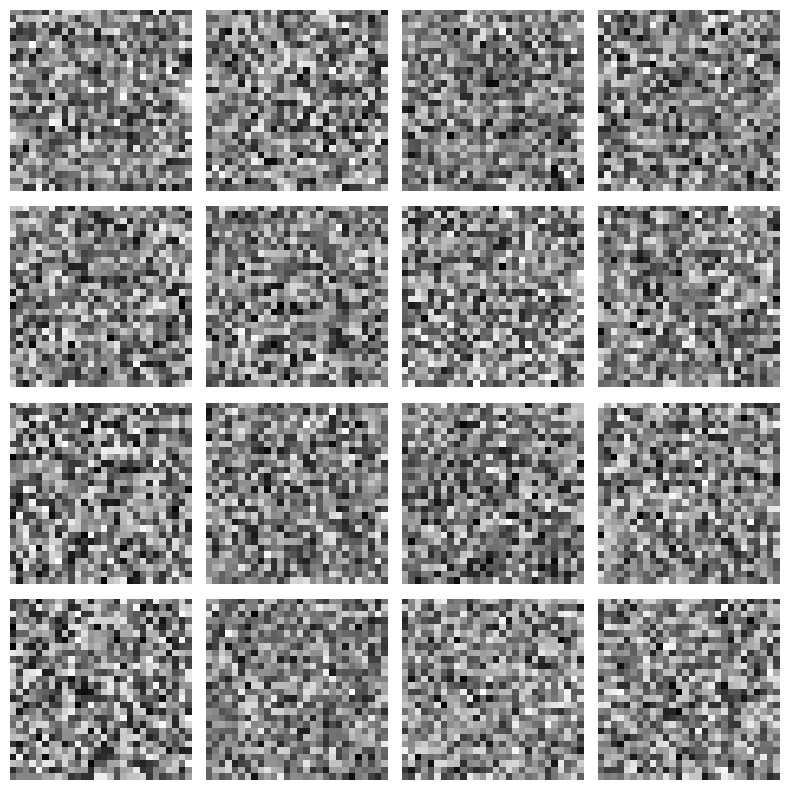

In [3]:
#  Use a trained generator to generate a batch of fake images and display them


import matplotlib.pyplot as plt
import numpy as np

# Assuming the generator is already trained and available as `generator`

# Generate a batch of latent vectors (noise)
latent_dim = 100  # Must match the generator's input size
num_images = 16  # Number of images to generate
z = np.random.normal(0, 1, (num_images, latent_dim))

# Generate images
fake_images = generator.predict(z)

# Rescale the images from [-1, 1] to [0, 1] for display
fake_images = 0.5 * fake_images + 0.5

# Display the generated images
fig, axes = plt.subplots(4, 4, figsize=(8, 8))  # Adjust grid for the number of images
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fake_images[i, :, :, 0], cmap="gray")  # Show the image (assuming grayscale)
    ax.axis("off")
plt.tight_layout()
plt.show()


In [13]:

#  Implement the Wasserstein loss function for GAN trainingimport torch
import torch.nn as nn

class WassersteinLoss(nn.Module):
    def __init__(self):
        super(WassersteinLoss, self).__init__()

    def forward(self, critic_output_real, critic_output_fake):
        """
        Calculates the Wasserstein loss.

        Args:
            critic_output_real: Critic's output on real data.
            critic_output_fake: Critic's output on fake data.

        Returns:
            Wasserstein loss.
        """
        return torch.mean(critic_output_fake) - torch.mean(critic_output_real)

# Example usage:
if __name__ == "__main__":
    # Create dummy data
    critic_output_real = torch.randn(64)
    critic_output_fake = torch.randn(64)

    # Create the Wasserstein loss object
    wasserstein_loss = WassersteinLoss()

    # Calculate the loss
    loss = wasserstein_loss(critic_output_real, critic_output_fake)

    print(f"Wasserstein Loss: {loss}")

Wasserstein Loss: -0.00402764230966568


In [14]:
# Write a function to modify the discriminator to include a dropout layer with a rate of 0.4 and print the
# configurations
import torch
import torch.nn as nn

class DiscriminatorWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.4):
        super(DiscriminatorWithDropout, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x

# Example usage:
input_size = 784  # Example input size
hidden_size = 128  # Example hidden size
output_size = 1   # Example output size
dropout_rate = 0.4

# Create the discriminator with dropout
discriminator = DiscriminatorWithDropout(input_size, hidden_size, output_size, dropout_rate)

# Print the discriminator's configuration
print(discriminator)

DiscriminatorWithDropout(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.4, inplace=False)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
)
